In [11]:
from scipy.optimize import curve_fit
from modules.utils import *

In [12]:
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 15})

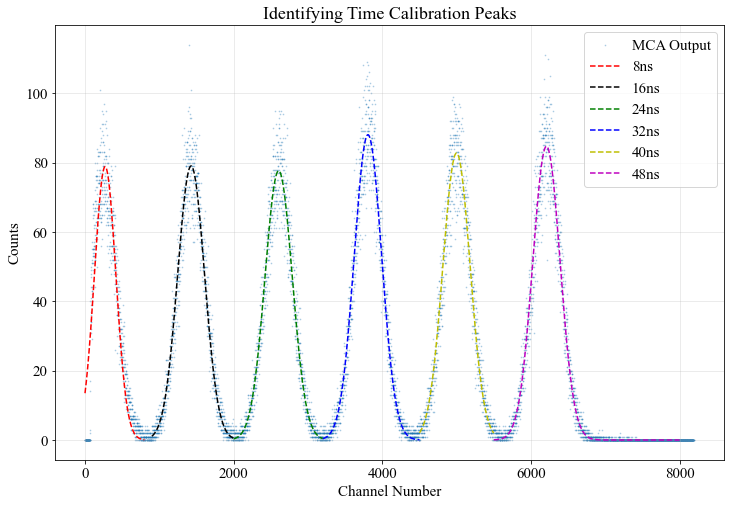

In [13]:
X, Y = pad_counts('Na_TAC_Calibration')
plt.scatter(X, Y, s=0.5, alpha=0.3, label='MCA Output')
# fitting gaussians on each peak
# first peak
x1 = X[0:800]
y1 = Y[0:800]
x0 = x1[np.argmax(y1)]
popt1, pcov1 = curve_fit(gaussian, x1, y1, p0=[1, x0, 1])
plt.plot(x1, gaussian(x1, *popt1), 'r--', label='8ns')

# second peak
x2 = X[900:2000]
y2 = Y[900:2000]
x0 = x2[np.argmax(y2)]
popt2, pcov2 = curve_fit(gaussian, x2, y2, p0=[1, x0, 1])
plt.plot(x2, gaussian(x2, *popt2), 'k--', label='16ns')

# third peak
x3 = X[2000:3200]
y3 = Y[2000:3200]
x0 = x3[np.argmax(y3)]
popt3, pcov3 = curve_fit(gaussian, x3, y3, p0=[1, x0, 1])
plt.plot(x3, gaussian(x3, *popt3), 'g--', label='24ns')

# fourth peak
x4 = X[3200:4500]
y4 = Y[3200:4500]
x0 = x4[np.argmax(y4)]
popt4, pcov4 = curve_fit(gaussian, x4, y4, p0=[1, x0, 1])
plt.plot(x4, gaussian(x4, *popt4), 'b--', label='32ns')

# fifth peak
x5 = X[4500:5500]
y5 = Y[4500:5500]
x0 = x5[np.argmax(y5)]
popt5, pcov5 = curve_fit(gaussian, x5, y5, p0=[1, x0, 1])
plt.plot(x5, gaussian(x5, *popt5), 'y--', label='40ns')

# sixth peak
x6 = X[5500:8000]
y6 = Y[5500:8000]
x0 = x6[np.argmax(y6)]
popt6, pcov6 = curve_fit(gaussian, x6, y6, p0=[1, x0, 1])
plt.plot(x6, gaussian(x6, *popt6), 'm--', label='48ns')

plt.legend()
plt.xlabel('Channel Number')
plt.ylabel('Counts')
plt.title('Identifying Time Calibration Peaks')
plt.grid(alpha=0.3)
plt.savefig('fig/others/IdentifyingTimeCalibrationPeaks.png', dpi=300)

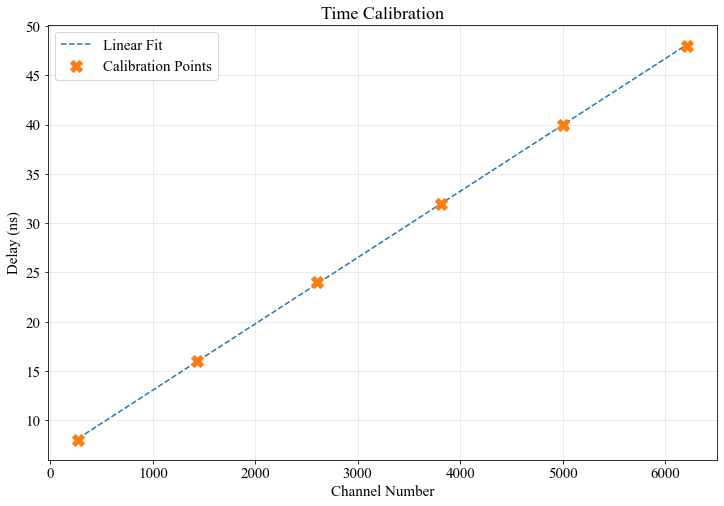

In [14]:
calibration_points = np.array([popt1[1], popt2[1], popt3[1], popt4[1], popt5[1], popt6[1]])
delay_range = np.arange(8, 49, 8)

popt, pcov = curve_fit(linear, calibration_points, delay_range)
plt.plot(calibration_points, linear(calibration_points, *popt), '--', label='Linear Fit')

plt.plot(calibration_points, delay_range, 'X', markersize=12, label='Calibration Points')
plt.legend()
plt.xlabel('Channel Number')
plt.ylabel('Delay (ns)')
plt.title('Time Calibration')
plt.grid(alpha=0.3)
plt.savefig('fig/others/TimeCalibration.png', dpi=300)

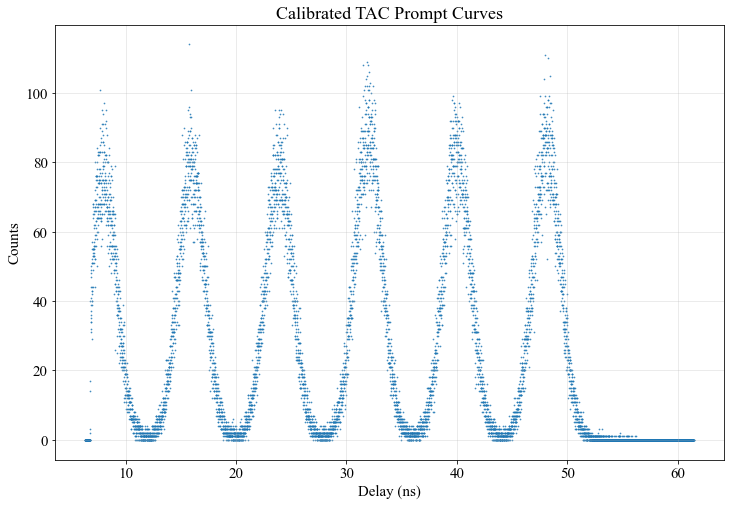

In [15]:
plt.scatter(linear(X, *popt), Y, s=0.5, alpha=0.8, label='MCA Output')
plt.xlabel('Delay (ns)')
plt.ylabel('Counts')
plt.title('Calibrated TAC Prompt Curves')
plt.grid(alpha=0.3)
plt.savefig('fig/others/CalibratedTACPromptCurves.png', dpi=300)

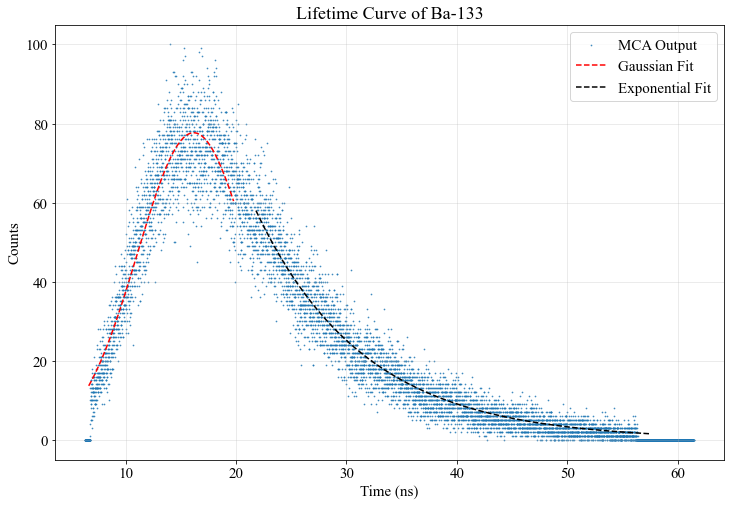

In [16]:
channel, counts = pad_counts('Life_time_curve')
plt.scatter(linear(channel, *popt), counts, s=0.5, alpha=0.8, label='MCA Output')
plt.xlabel('Time (ns)')
plt.ylabel('Counts')

#fitting gaussian for the first peak
x1 = linear(channel, *popt)[50:2000]
y1 = counts[50:2000]
x0 = x1[np.argmax(y1)]
popt1, pcov1 = curve_fit(gaussian, x1, y1, p0=[1, x0, 1])
plt.plot(x1, gaussian(x1, *popt1), 'r--', label='Gaussian Fit')

#fitting exponential for the remainder
x2 = linear(channel, *popt)[2300:-600]
y2 = counts[2300:-600]
popt2, pcov2 = curve_fit(lambda x, a, b, c: a*np.exp(-(x)/b) + c, x2, y2, p0=[1, 1, 18])
plt.plot(x2, popt2[0]*np.exp(-(x2)/popt2[1]), 'k--', label='Exponential Fit')
plt.legend()
plt.title('Lifetime Curve of Ba-133')
plt.grid(alpha=0.3)
plt.savefig('fig/others/LifetimeCurve.png', dpi=300)

In [17]:
print("As calculated by the exponential fit, the lifetime of Ba-133 is: ", np.round(popt2[1], 3), "ns")
print("As calculated by the gaussian fit, the lifetime of Ba-133 is: ", np.round(2*np.sqrt(2*np.log(2))*popt1[2], 3), "ns")

As calculated by the exponential fit, the lifetime of Ba-133 is:  9.807 ns
As calculated by the gaussian fit, the lifetime of Ba-133 is:  11.999 ns
